# Лабораторна робота №6
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.9154 - val_loss: 0.1563 - val_accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1371 - accuracy: 0.9593 - val_loss: 0.1141 - val_accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0989 - accuracy: 0.9706 - val_loss: 0.1010 - val_accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0790 - accuracy: 0.9757 - val_loss: 0.0959 - val_accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0635 - accuracy: 0.9805 - val_loss: 0.0904 - val_accuracy: 0.9718
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0533 - accuracy: 0.9828 - val_loss: 0.0990 - val_accuracy: 0.9701
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0463 - accuracy: 0.9852 - val_loss: 0.1018 - val_accuracy:

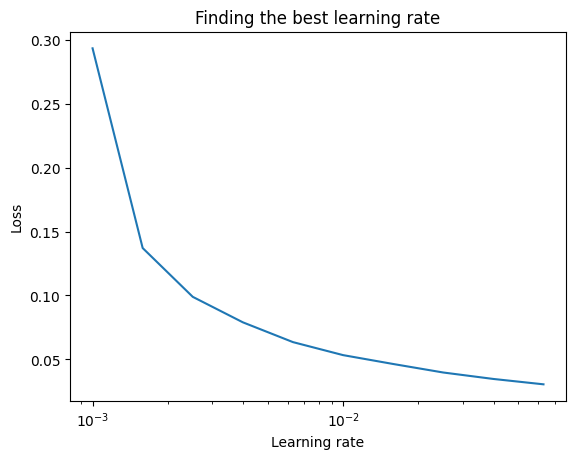

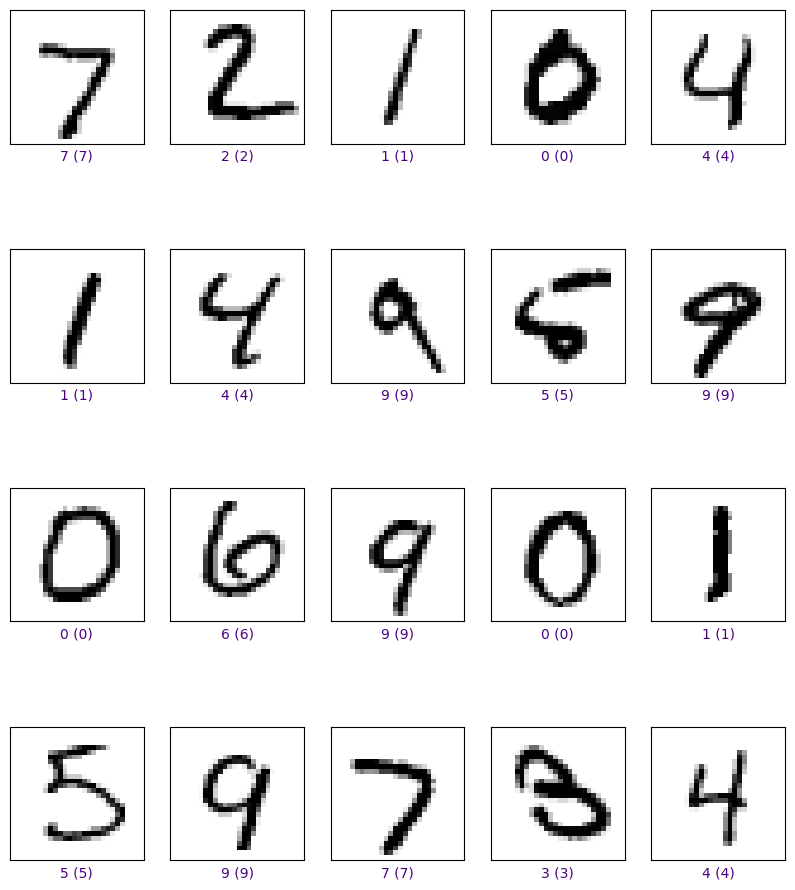

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import LearningRateScheduler
import math
import pandas as pd

#The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

'''
#Model with non normalized data (for self-educational purposes)
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

#Plot multiple random data of downloaded MNIST
import random
plt.figure(figsize=(5, 5))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

tf.random.set_seed(33)

non_norm_model = Sequential([
  Flatten(input_shape=(28, 28)),  #Input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  Dense(4, activation="relu"),
  Dense(4, activation="relu"),
  Dense(10, activation="softmax")  #Output shape is 10, activation is softmax
])

non_norm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  #Different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = non_norm_model.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))'''


#Divide train and test data by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0


tf.random.set_seed(33)
#Create the model
model = Sequential([
  Flatten(input_shape=(28, 28)),  #Input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  #Dense(128, activation="relu"),  #Testing one more layer, but accuracy result is the same as without it
  Dense(64, activation="relu"),
  Dense(32, activation="relu"),
  Dense(10, activation="softmax")  #Output shape is 10 (because we have 10 different classes to predict), activation is softmax (multiclass)
])


#Compile and train the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  #Different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(lr=0.1),
                 metrics=["accuracy"])

#Fit the model
history = model.fit(train_data,
                    train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels))

#Plot the learning rate decay curve to find the best learning rate for our model
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(10)/5))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")


test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(test_data)
#Function to display data and their predicted labels
def plot_data(data, labels, predictions, length):
    num_rows = (length // 5) + 1
    plt.figure(figsize=(10, 3 * num_rows))
    for i in range(length):
        plt.subplot(5, 5, i+1)
        plt.imshow(data[i], cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        predicted_label = tf.argmax(predictions[i])
        true_label = labels[i]
        if predicted_label == true_label:
            color = 'indigo'
        else:
            color = 'deeppink'
        plt.xlabel(f'{predicted_label} ({true_label})', color=color)
    plt.show()

#Visualize the first 20 test images
plot_data(test_data, test_labels, predictions, 20)
